In [1]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

from tensorflow.keras.layers import Dropout

In [2]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 22.4 MB/s eta 0:00:00


In [3]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=NABIL&resolution=1D&rangeStartDate=1514744100&rangeEndDate=1766394980&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("NABIL.json", "w") as f:
    json.dump(data, f)

In [4]:
companies = ["/content/NABIL.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1514699100, 1514785500, 1514871900, 1514958300, 1515044700, 1515303900, 1515390300, 1515476700, 1515563100, 1515908700, 1516081500, 1516167900, 1516513500, 1516599900, 1516686300, 1516772700, 1516859100, 1517118300, 1517204700, 1517377500, 1517463900, 1517723100, 1517809500, 1517895900, 1517982300, 1518068700, 1518327900, 1518414300, 1518587100, 1518673500, 1518986700, 1519159500, 1519245900, 1519332300, 1519591500, 1519677900, 1519764300, 1519850700, 1520196300, 1520282700, 1520369100, 1520455500, 1520801100, 1520887500, 1520973900, 1521060300, 1521146700, 1521405900, 1521492300, 1521578700, 1521665100, 1521751500, 1522097100, 1522183500, 1522269900, 1522356300, 1522615500, 1522701900, 1522788300, 1522874700, 1522961100, 1523220300, 1523306700, 1523393100, 1523479500, 1523565900, 1523825100, 1523911500, 1523997900, 1524084300, 1524170700, 1524429900, 1524516300, 1524602700, 1524689100, 1524775500, 1525034700, 1525293900, 1525380300, 1525639500, 1525725900, 1525812300, 152589870

In [5]:
df = pd.read_csv("NABIL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

1827


In [6]:
def plot_graph(figsize, df_to_plot, column_name):
    # df_to_plot is already assumed to have 'Date' as its index
    df_to_plot = df_to_plot.sort_index()

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"NABIL {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

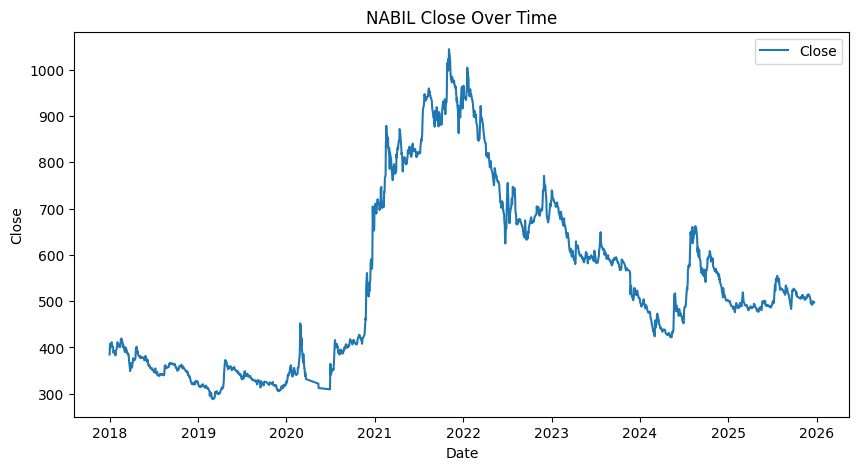

In [7]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")

In [8]:
to_row=int(len(df)*0.8)
training_data=list(df[0:to_row]['Close'])
testing_data=list(df[to_row:]['Close'])

In [9]:
testing_data

[431.0,
 437.0,
 458.0,
 480.9,
 514.0,
 517.0,
 507.9,
 489.0,
 478.3,
 490.0,
 484.9,
 483.0,
 480.0,
 477.0,
 474.0,
 468.0,
 478.0,
 483.0,
 479.1,
 475.0,
 469.0,
 472.0,
 470.1,
 466.0,
 461.1,
 458.2,
 456.0,
 456.0,
 452.0,
 458.8,
 477.1,
 484.0,
 487.0,
 487.0,
 490.0,
 490.2,
 497.1,
 507.0,
 529.0,
 524.0,
 532.9,
 538.0,
 567.0,
 577.0,
 574.0,
 579.0,
 579.0,
 575.9,
 633.4,
 649.0,
 644.0,
 649.3,
 645.0,
 660.0,
 625.0,
 631.5,
 630.0,
 639.1,
 646.9,
 647.9,
 645.0,
 660.0,
 662.0,
 658.3,
 654.0,
 636.9,
 605.6,
 616.0,
 605.0,
 595.0,
 611.7,
 610.0,
 595.0,
 592.0,
 586.0,
 573.0,
 569.8,
 561.5,
 569.0,
 571.0,
 561.2,
 556.0,
 562.0,
 568.0,
 553.5,
 555.0,
 550.0,
 541.5,
 550.0,
 568.0,
 565.0,
 574.0,
 591.5,
 591.0,
 593.0,
 593.0,
 600.0,
 608.0,
 607.1,
 597.0,
 585.5,
 591.0,
 594.0,
 591.5,
 587.0,
 585.0,
 591.8,
 576.0,
 567.0,
 564.6,
 570.0,
 569.0,
 566.2,
 561.0,
 562.0,
 562.1,
 559.8,
 557.0,
 553.7,
 558.0,
 547.6,
 545.0,
 548.0,
 540.0,
 536.0,


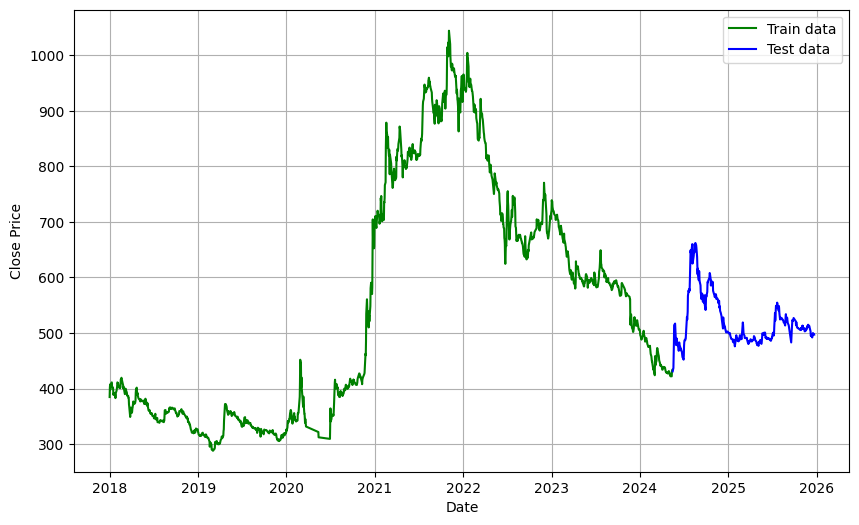

In [10]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [11]:
model_predictions=[]
n_test_obser = len(testing_data)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions=[] # Re-initialize as a list
n_test_obser = len(testing_data)

for i in range(n_test_obser):
  model= ARIMA(training_data,order=(4,1,0))

  model_fit = model.fit()

  output = model_fit.forecast()

  model_predictions.append(output)
  actual_test_value = testing_data[i]

  training_data.append(actual_test_value)
  print(output)

[433.93473402]
[430.74971593]
[438.11790249]
[460.72300641]
[483.03945773]
[518.09708678]
[516.24097294]
[506.96578356]
[487.2468658]
[477.75258913]
[492.29115378]
[483.08176084]
[482.80388949]
[479.86478891]
[476.61259335]
[473.67133815]
[467.18395614]
[479.83759481]
[483.14293412]
[478.09665258]
[474.77713524]
[468.39864763]
[472.74272148]
[469.55790014]
[465.36289935]
[460.63407107]
[457.99879406]
[455.75015087]
[456.03597738]
[451.32461218]
[460.04375119]
[479.5572297]
[483.93946803]
[487.19389532]
[487.16133991]
[490.59879389]
[490.11402853]
[498.16859407]
[508.21295572]
[531.92561126]
[522.0862075]
[534.7676245]
[538.74251375]
[571.15751401]
[577.24623384]
[573.07690841]
[580.66408485]
[578.97122979]
[575.33838562]
[642.72089582]
[648.3313714]
[642.42274207]
[651.76880852]
[644.29085115]
[662.53274067]
[618.91659786]
[634.19070174]
[629.77450897]
[639.65759375]
[647.77855308]
[647.62107067]
[644.71393557]
[662.58685799]
[661.58603116]
[657.56749431]
[653.89562818]
[634.57927763]


In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -6641.205
Date:                Mon, 22 Dec 2025   AIC                          13292.409
Time:                        12:54:56   BIC                          13319.956
Sample:                             0   HQIC                         13302.571
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1446      0.012     11.623      0.000       0.120       0.169
ar.L2         -0.0551      0.016     -3.427      0.001      -0.087      -0.024
ar.L3          0.0093      0.019      0.502      0.6

In [14]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)


<class 'list'>
(366, 1)
[array([433.93473402]), array([430.74971593]), array([438.11790249]), array([460.72300641]), array([483.03945773]), array([518.09708678]), array([516.24097294]), array([506.96578356]), array([487.2468658]), array([477.75258913]), array([492.29115378]), array([483.08176084]), array([482.80388949]), array([479.86478891]), array([476.61259335]), array([473.67133815]), array([467.18395614]), array([479.83759481]), array([483.14293412]), array([478.09665258]), array([474.77713524]), array([468.39864763]), array([472.74272148]), array([469.55790014]), array([465.36289935]), array([460.63407107]), array([457.99879406]), array([455.75015087]), array([456.03597738]), array([451.32461218]), array([460.04375119]), array([479.5572297]), array([483.93946803]), array([487.19389532]), array([487.16133991]), array([490.59879389]), array([490.11402853]), array([498.16859407]), array([508.21295572]), array([531.92561126]), array([522.0862075]), array([534.7676245]), array([538.74

In [15]:
import numpy as np
# Ensure model_predictions is a 1D NumPy array of scalar values
# Each element in model_predictions is currently a single-element NumPy array (e.g., array([value]))
# We extract the scalar from each and create a new 1D array.
model_predictions = np.array([p.item() for p in model_predictions])

In [16]:
print(type(model_predictions), np.array(model_predictions).shape)


<class 'numpy.ndarray'> (366,)


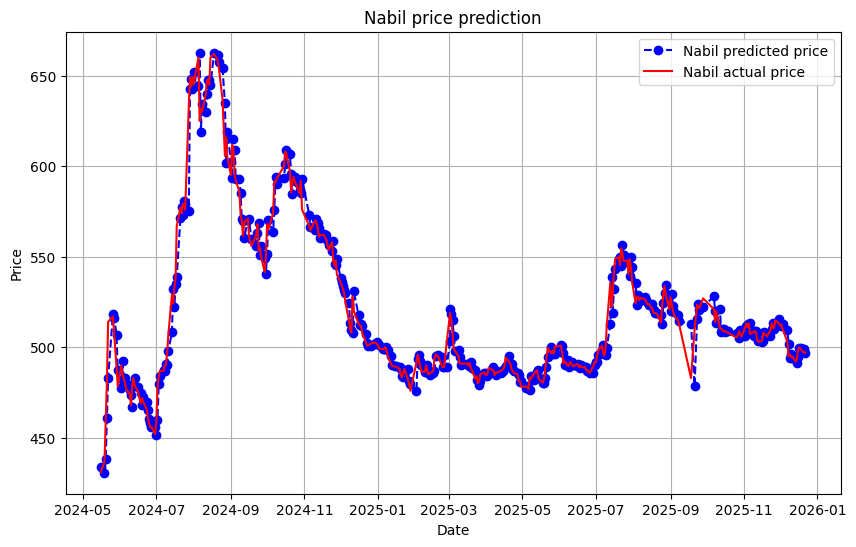

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='Nabil predicted price')
plt.plot(date_range, testing_data,color='red',label='Nabil actual price')

plt.title('Nabil price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.008947740025060224


In [19]:
#TRUE FORECASTING


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

to_row = int(len(df) * 0.8)

training_data = df[:to_row]['Close']
testing_data  = df[to_row:]['Close']


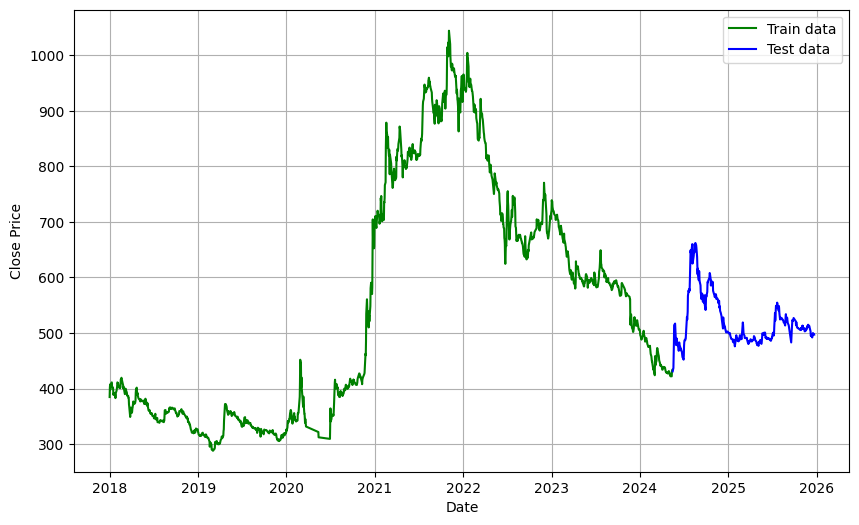

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)

plt.plot(training_data.index, training_data, label='Train data', color='green')
plt.plot(testing_data.index, testing_data, label='Test data', color='blue')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [21]:
model = ARIMA(training_data, order=(4,1,0))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1461
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5362.522
Date:                Mon, 22 Dec 2025   AIC                          10735.044
Time:                        12:54:57   BIC                          10761.475
Sample:                             0   HQIC                         10744.904
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1459      0.014     10.523      0.000       0.119       0.173
ar.L2         -0.0590      0.018     -3.325      0.001      -0.094      -0.024
ar.L3          0.0043      0.021      0.206      0.8

In [22]:
n_forecast = len(testing_data)

forecast = model_fit.forecast(steps=n_forecast)
forecast = np.array(forecast)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


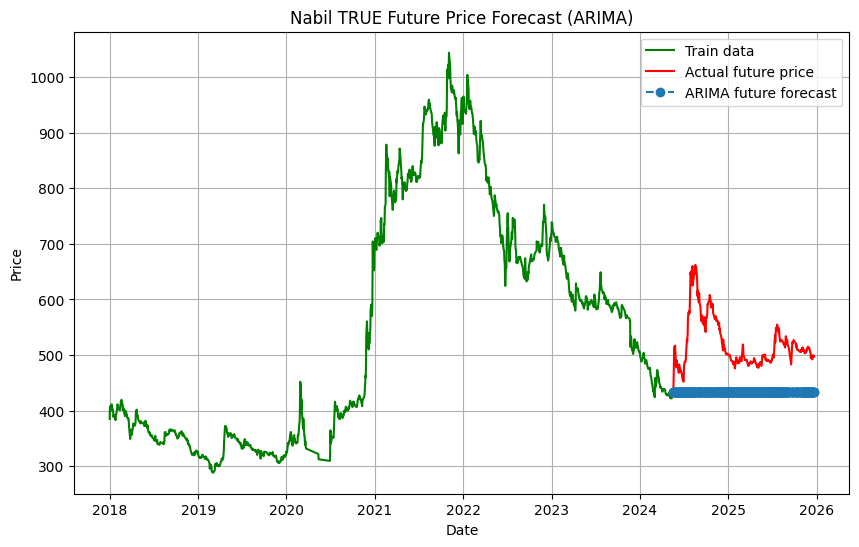

In [23]:
plt.figure(figsize=(10,6))
plt.grid(True)

plt.plot(training_data.index, training_data, label='Train data', color='green')
plt.plot(testing_data.index, testing_data, label='Actual future price', color='red')

plt.plot(
    testing_data.index,
    forecast,
    label='ARIMA future forecast',
    linestyle='dashed',
    marker='o'
)

plt.title('Nabil TRUE Future Price Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


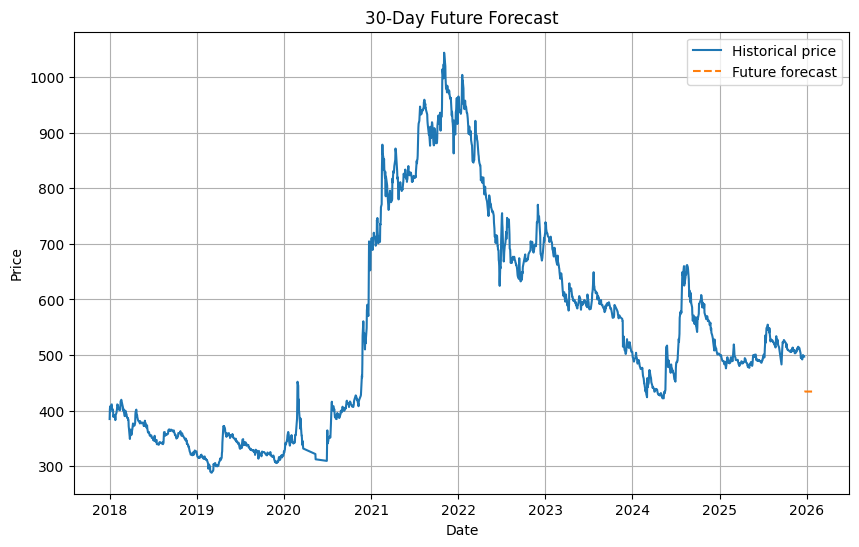

In [24]:
future_steps = 30
future_forecast = model_fit.forecast(steps=future_steps)

future_dates = pd.date_range(
    start=df.index[-1],
    periods=future_steps + 1,
    freq='B'  # business days
)[1:]

plt.figure(figsize=(10,6))
plt.grid(True)

plt.plot(df.index, df['Close'], label='Historical price')
plt.plot(future_dates, future_forecast, label='Future forecast', linestyle='dashed')

plt.title('30-Day Future Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#Trend

df.columns

In [ ]:
Close = df['Close'].values   # numpy array
trend = (Close[1:] > Close[:-1]).astype(int)

In [ ]:
split = int(len(Close) * 0.8)
train, test = Close[:split], Close[split:]
trend_test = trend[split:]

In [ ]:
history = list(train)
predicted_trend = []

for i in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    
    forecast = model_fit.forecast()[0]
    
    predicted_trend.append(1 if forecast > history[-1] else 0)
    history.append(test[i])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(trend_test, predicted_trend)
print("ARIMA Trend Accuracy:", accuracy)
print(classification_report(trend_test, predicted_trend))

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(trend_test, label="Actual Trend")
plt.plot(predicted_trend, label="Predicted Trend", linestyle="--")
plt.title("ARIMA Trend Prediction")
plt.legend()
plt.show()

In [ ]:
#Sarima

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Convert series to list for rolling update
history = list(train)

sarima_trend_pred = []

for i in range(len(test)):

    model = SARIMAX(
        history,
        order=(4, 1, 0),
        seasonal_order=(0, 0, 0, 0),  # IMPORTANT: no seasonality for daily stocks
        trend="t",
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    model_fit = model.fit(disp=False)

    # 1-step ahead forecast
    forecast = model_fit.forecast(steps=1)[0]

    # Direction (trend)
    sarima_trend_pred.append(
        1 if forecast > history[-1] else 0
    )

    # Update history with actual observed value
    history.append(test[i])

In [ ]:

accuracy = accuracy_score(trend_test, sarima_trend_pred)
print("SARIMA Trend Accuracy:", accuracy)
print(classification_report(trend_test, sarima_trend_pred))